In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
try:
    df = pd.read_csv('../data/AmesHousing.csv')
    print("Original Data Loaded. First 5 rows:")
    print(df.head())
    print("\nOriginal DataFrame Info:")
    df.info()
except FileNotFoundError:
    print("Error: 'AmesHousing.csv' not found. Please ensure it's in the '../data/' directory.")
    # Exit or handle the error appropriately if the file isn't found
    exit()

Original Data Loaded. First 5 rows:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  

In [22]:
df_eda = df.copy()

In [23]:
print("\nApplying robust column standardization...")
new_columns = []
for col in df_eda.columns:
    # 1. Convert to lowercase
    cleaned_col = col.lower()
    # 2. Replace any character that is NOT a lowercase letter, number, or underscore with an underscore
    cleaned_col = re.sub(r'[^a-z0-9_]', '_', cleaned_col)
    # 3. Replace multiple underscores with a single underscore
    cleaned_col = re.sub(r'_{2,}', '_', cleaned_col)
    # 4. Strip leading/trailing underscores (important for 'saleprice ' original name)
    cleaned_col = cleaned_col.strip('_')
    new_columns.append(cleaned_col)
df_eda.columns = new_columns
print("DataFrame columns standardized successfully in df_eda.")
print("Columns in df_eda after standardization:", df_eda.columns.tolist())


Applying robust column standardization...
DataFrame columns standardized successfully in df_eda.
Columns in df_eda after standardization: ['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 'year_built', 'year_remod_add', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_q

In [24]:
initial_rows = df_eda.shape[0]
df_eda.drop_duplicates(inplace=True)
rows_after_duplicates = df_eda.shape[0]
if df_eda.shape[0] < initial_rows:
    print(f"Duplicate rows removed: {initial_rows - rows_after_duplicates}")
print(f"DataFrame shape after dropping duplicates: {df_eda.shape}")

DataFrame shape after dropping duplicates: (2930, 82)


In [25]:
if 'order' in df_eda.columns:
    df_eda.drop('order', axis=1, inplace=True)
    print("Dropped 'order' column.")
if 'pid' in df_eda.columns:
    df_eda.drop('pid', axis=1, inplace=True)
    print("Dropped 'pid' column.")

Dropped 'order' column.
Dropped 'pid' column.


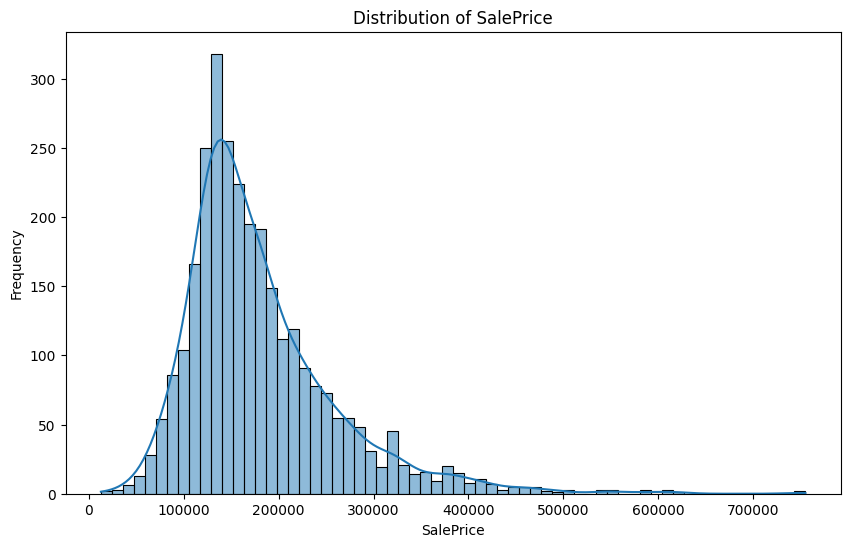

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['saleprice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


In [27]:
print(f"\nSkewness of SalePrice: {df_eda['saleprice'].skew():.4f}")
print(f"Kurtosis of SalePrice: {df_eda['saleprice'].kurt():.4f}")


Skewness of SalePrice: 1.7435
Kurtosis of SalePrice: 5.1189



SalePrice is highly skewed. Applied log1p transformation to create 'saleprice_log'.


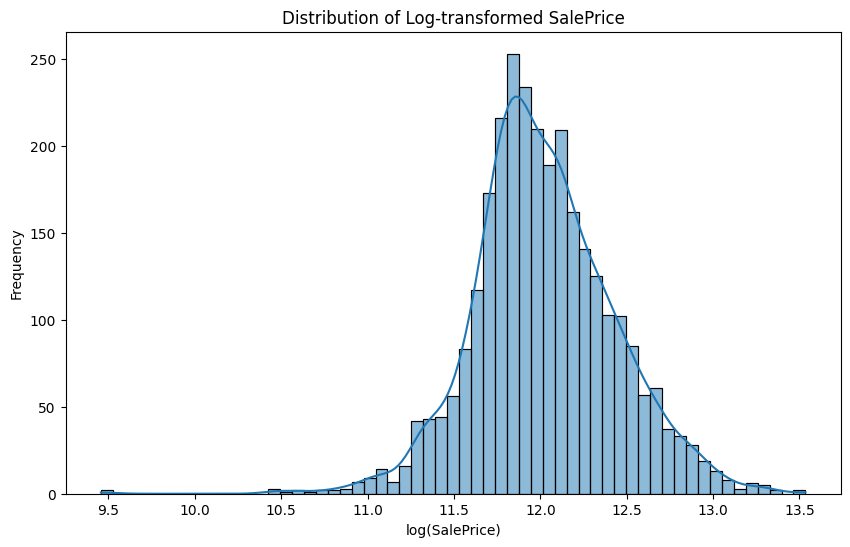

Skewness of Log-transformed SalePrice: -0.0148


In [28]:
if df_eda['saleprice'].skew() > 0.75:
    df_eda['saleprice_log'] = np.log1p(df_eda['saleprice'])
    print("\nSalePrice is highly skewed. Applied log1p transformation to create 'saleprice_log'.")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_eda['saleprice_log'], kde=True)
    plt.title('Distribution of Log-transformed SalePrice')
    plt.xlabel('log(SalePrice)')
    plt.ylabel('Frequency')
    plt.show()
    print(f"Skewness of Log-transformed SalePrice: {df_eda['saleprice_log'].skew():.4f}")
else:
    print("\nSalePrice is not highly skewed. No log transformation applied yet.")


In [29]:
missing_values = df_eda.isnull().sum()
missing_percentage = (missing_values / len(df_eda)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percentage', ascending=False)

print("\nMissing Values Overview:")
print(missing_df)



Missing Values Overview:
                Missing Count  Percentage
pool_qc                  2917   99.556314
misc_feature             2824   96.382253
alley                    2732   93.242321
fence                    2358   80.477816
mas_vnr_type             1775   60.580205
fireplace_qu             1422   48.532423
lot_frontage              490   16.723549
garage_qual               159    5.426621
garage_cond               159    5.426621
garage_yr_blt             159    5.426621
garage_finish             159    5.426621
garage_type               157    5.358362
bsmt_exposure              83    2.832765
bsmtfin_type_2             81    2.764505
bsmt_cond                  80    2.730375
bsmt_qual                  80    2.730375
bsmtfin_type_1             80    2.730375
mas_vnr_area               23    0.784983
bsmt_full_bath              2    0.068259
bsmt_half_bath              2    0.068259
bsmtfin_sf_1                1    0.034130
bsmtfin_sf_2                1    0.034130
electric

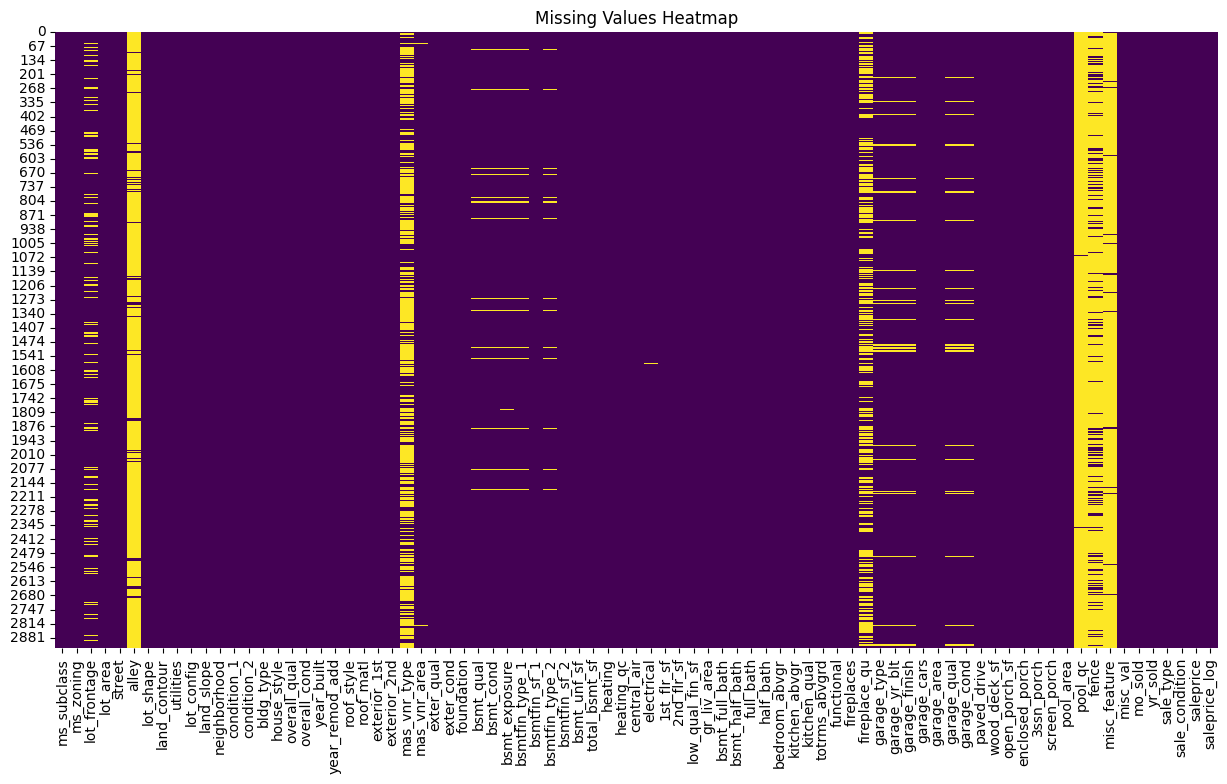

In [30]:
# Visualize missing values (a heatmap can show patterns)
plt.figure(figsize=(15, 8))
sns.heatmap(df_eda.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [31]:
high_missing_cols = missing_df[missing_df['Percentage'] > 50].index.tolist()
print(f"\nColumns with more than 50% missing values (candidates for dropping or 'None' imputation): {high_missing_cols}")




Columns with more than 50% missing values (candidates for dropping or 'None' imputation): ['pool_qc', 'misc_feature', 'alley', 'fence', 'mas_vnr_type']


In [32]:

# --- 5. Outlier Detection and Visualization ---
numerical_cols = df_eda.select_dtypes(include=np.number).columns.tolist()
# Exclude the original saleprice if log-transformed version is created
if 'saleprice_log' in df_eda.columns:
    numerical_cols.remove('saleprice')
else:
    # Ensure saleprice is in numerical_cols if not log transformed
    if 'saleprice' not in numerical_cols:
        numerical_cols.append('saleprice')



Outlier Detection for Numerical Features:


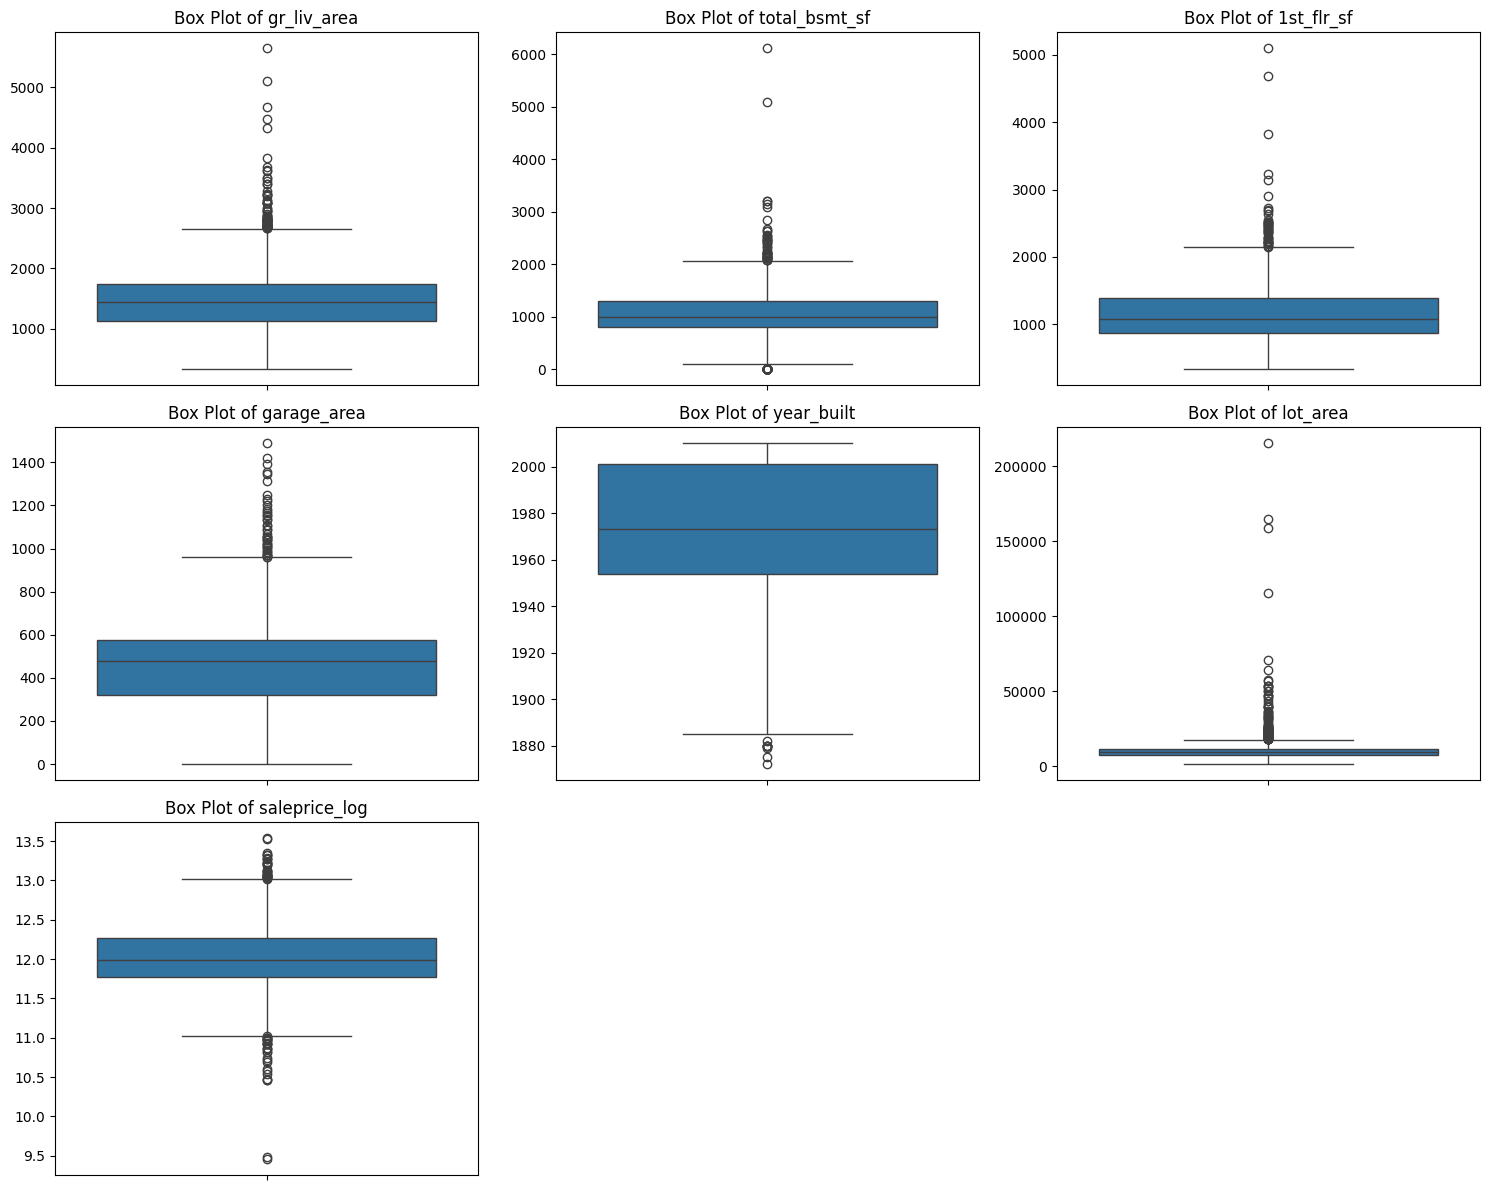

In [33]:
print("\nOutlier Detection for Numerical Features:")
# Plotting box plots for a sample of numerical features or top correlated ones
# Select some key numerical features for outlier visualization
important_numerical_features = ['gr_liv_area', 'total_bsmt_sf', '1st_flr_sf', 'garage_area', 'year_built', 'lot_area']
if 'saleprice_log' in df_eda.columns:
    important_numerical_features.append('saleprice_log')
else:
    important_numerical_features.append('saleprice')
    

# Ensure these columns exist in the DataFrame after cleaning steps
important_numerical_features = [col for col in important_numerical_features if col in df_eda.columns]

num_plots = len(important_numerical_features)
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(important_numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_eda[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()


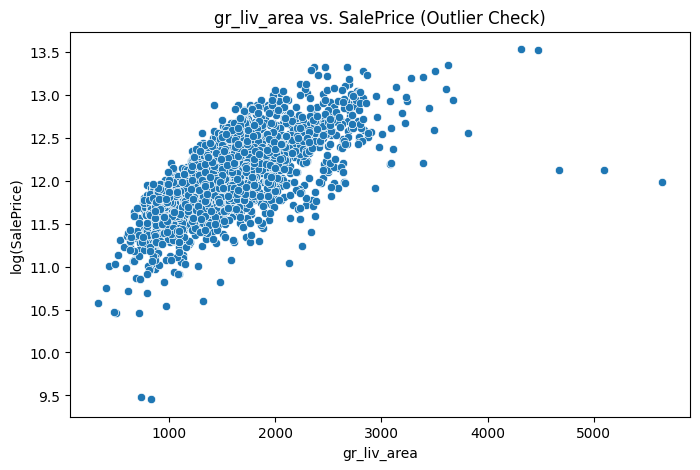

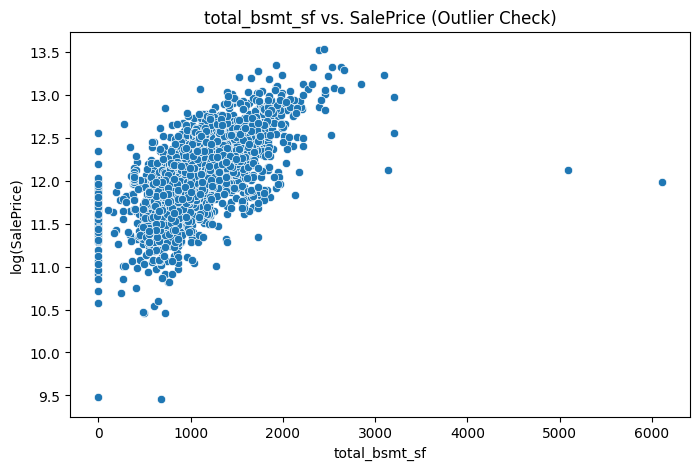

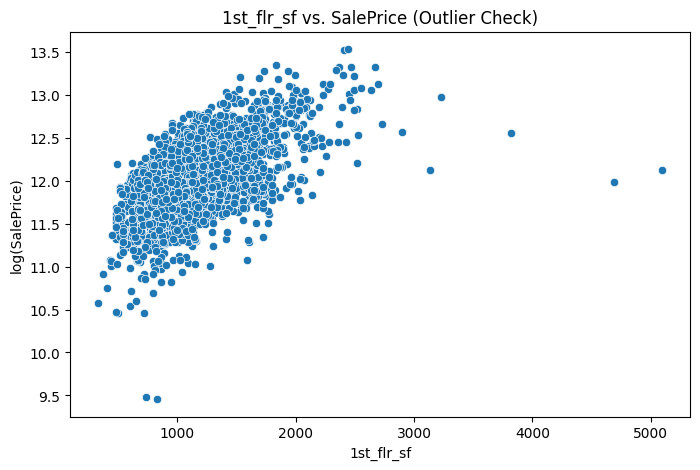

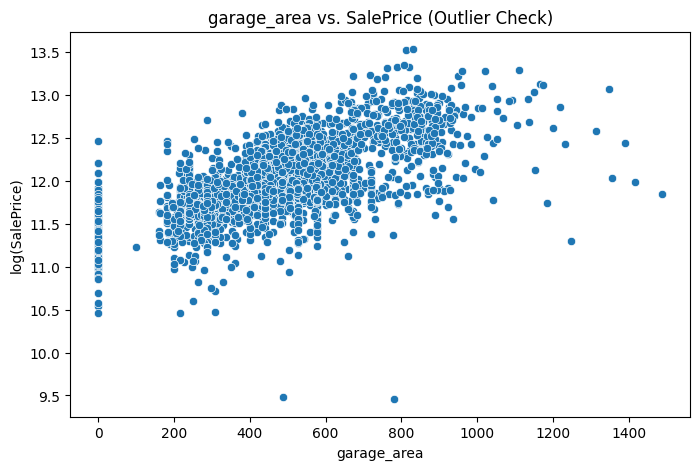

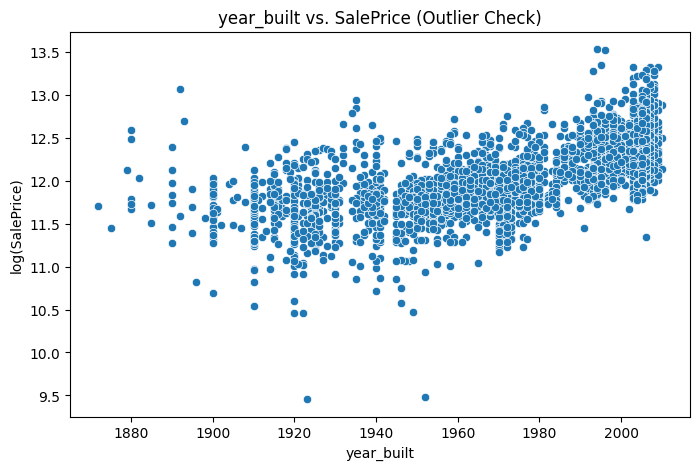

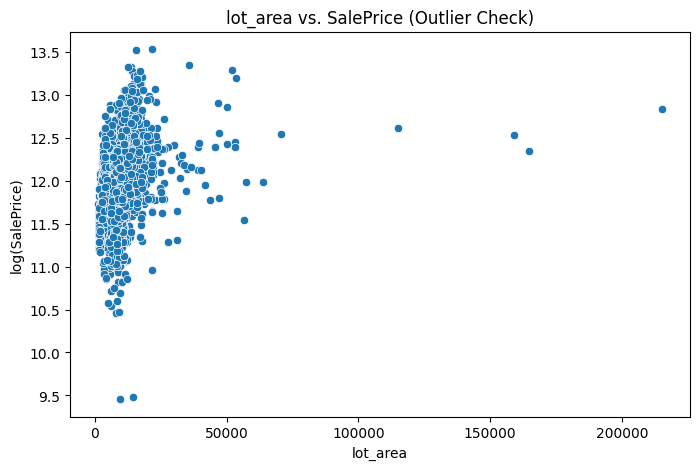

In [34]:
# Scatter plots for numerical features vs. SalePrice to visualize outliers impact
for col in important_numerical_features:
    if col != 'saleprice' and col != 'saleprice_log': # Don't plot target against itself
        plt.figure(figsize=(8, 5))
        if 'saleprice_log' in df_eda.columns:
            sns.scatterplot(x=df_eda[col], y=df_eda['saleprice_log'])
            plt.ylabel('log(SalePrice)')
        else:
            sns.scatterplot(x=df_eda[col], y=df_eda['saleprice'])
            plt.ylabel('SalePrice')
        plt.title(f'{col} vs. SalePrice (Outlier Check)')
        plt.xlabel(col)
        plt.show()


Outlier Detection for Categorical Features (using SalePrice medians/means):


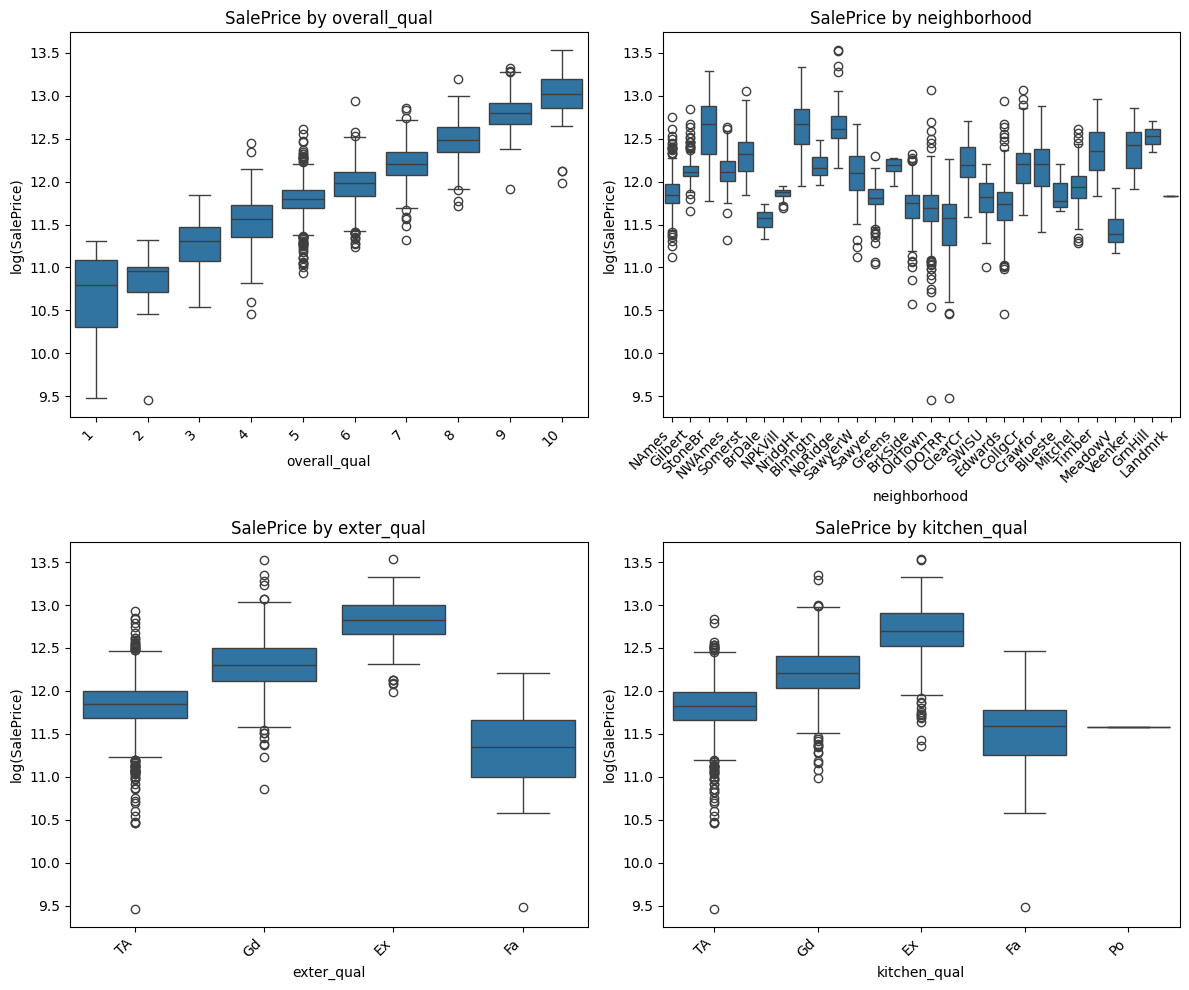

In [35]:
categorical_cols = df_eda.select_dtypes(include='object').columns.tolist()
print("\nOutlier Detection for Categorical Features (using SalePrice medians/means):")
# Box plots of SalePrice by each category
# Select a few categorical features to visualize relationships with SalePrice
important_categorical_features = ['overall_qual', 'neighborhood', 'exter_qual', 'kitchen_qual'] # Overall Qual is numeric but treated as ordinal-categorical sometimes

# Ensure these columns exist in the DataFrame
important_categorical_features = [col for col in important_categorical_features if col in df_eda.columns]

num_cat_plots = len(important_categorical_features)
n_cat_cols = 2
n_cat_rows = (num_cat_plots + n_cat_cols - 1) // n_cat_cols

plt.figure(figsize=(n_cat_cols * 6, n_cat_rows * 5))
for i, col in enumerate(important_categorical_features):
    plt.subplot(n_cat_rows, n_cat_cols, i + 1)
    if 'saleprice_log' in df_eda.columns:
        sns.boxplot(x=df_eda[col], y=df_eda['saleprice_log'])
        plt.ylabel('log(SalePrice)')
    else:
        sns.boxplot(x=df_eda[col], y=df_eda['saleprice'])
        plt.ylabel('SalePrice')
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
print("\nFeature-Target Correlation Analysis:")

# Numerical Features Correlation
correlation_matrix = df_eda[numerical_cols].corr()
target_correlation = correlation_matrix['saleprice_log' if 'saleprice_log' in df_eda.columns else 'saleprice'].sort_values(ascending=False)
print("\nCorrelation of Numerical Features with SalePrice:")
print(target_correlation)


Feature-Target Correlation Analysis:

Correlation of Numerical Features with SalePrice:
saleprice_log      1.000000
overall_qual       0.825645
gr_liv_area        0.695863
garage_cars        0.675318
garage_area        0.651132
total_bsmt_sf      0.625099
year_built         0.615485
1st_flr_sf         0.602629
year_remod_add     0.586153
garage_yr_blt      0.580502
full_bath          0.577335
totrms_abvgrd      0.492580
fireplaces         0.488945
mas_vnr_area       0.448613
bsmtfin_sf_1       0.410801
lot_frontage       0.350224
wood_deck_sf       0.333320
open_porch_sf      0.319938
half_bath          0.305921
bsmt_full_bath     0.275249
2nd_flr_sf         0.274692
lot_area           0.255032
bsmt_unf_sf        0.193790
bedroom_abvgr      0.180503
screen_porch       0.110425
pool_area          0.054403
3ssn_porch         0.040248
mo_sold            0.038960
bsmtfin_sf_2       0.018332
misc_val          -0.008718
bsmt_half_bath    -0.020954
yr_sold           -0.033131
low_qual_fin_sf

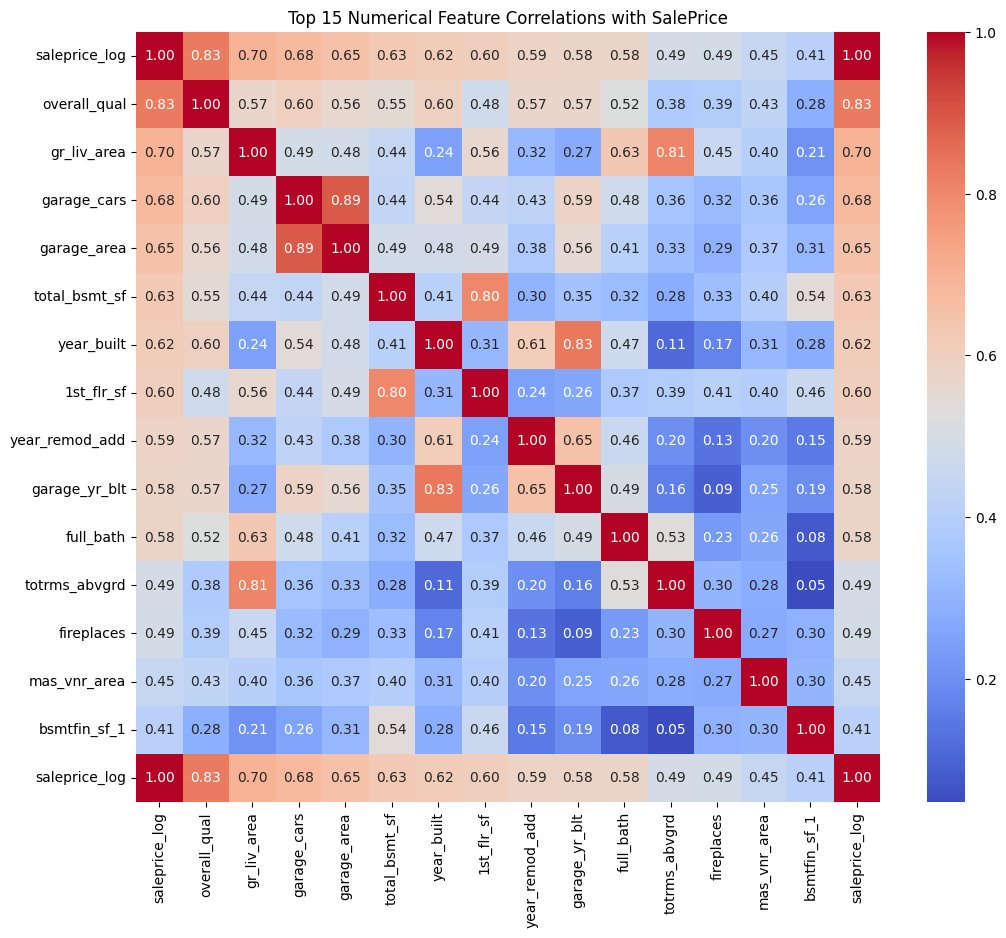

In [37]:

# Visualize top N correlated numerical features
top_n = 15
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix.loc[
        target_correlation.index[:top_n].tolist() + ['saleprice_log' if 'saleprice_log' in df_eda.columns else 'saleprice'],
        target_correlation.index[:top_n].tolist() + ['saleprice_log' if 'saleprice_log' in df_eda.columns else 'saleprice']
    ],
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Top 15 Numerical Feature Correlations with SalePrice')
plt.show()

In [38]:
# Categorical Features Analysis (using groupby and mean)
print("\nMean SalePrice by Category for selected features:")
for col in categorical_cols:
    if df_eda[col].nunique() < 20: # Limit to features with reasonable number of unique categories
        print(f"\n--- {col} ---")
        if 'saleprice_log' in df_eda.columns:
            print(df_eda.groupby(col)['saleprice_log'].mean().sort_values(ascending=False))
        else:
            print(df_eda.groupby(col)['saleprice'].mean().sort_values(ascending=False))
    else:
        print(f"\nSkipping {col} due to high number of unique categories ({df_eda[col].nunique()}).")



Mean SalePrice by Category for selected features:

--- ms_zoning ---
ms_zoning
FV         12.269621
RL         12.086429
RH         11.785074
RM         11.692192
I (all)    11.252112
C (all)    11.209777
A (agr)    10.394407
Name: saleprice_log, dtype: float64

--- street ---
street
Pave    12.023278
Grvl    11.460924
Name: saleprice_log, dtype: float64

--- alley ---
alley
Pave    12.049777
Grvl    11.680845
Name: saleprice_log, dtype: float64

--- lot_shape ---
lot_shape
IR2    12.283120
IR3    12.228761
IR1    12.188841
Reg    11.920067
Name: saleprice_log, dtype: float64

--- land_contour ---
land_contour
HLS    12.336494
Low    12.061615
Lvl    12.014527
Bnk    11.821649
Name: saleprice_log, dtype: float64

--- utilities ---
utilities
AllPub    12.021528
NoSeWa    11.831386
NoSewr    11.307213
Name: saleprice_log, dtype: float64

--- lot_config ---
lot_config
CulDSac    12.249371
FR3        12.109673
FR2        12.018723
Corner     12.014082
Inside     12.002920
Name: saleprice_